In [192]:
#******************* DOWNLOADING ALL THE LIBRARIES AND PACKAGES **************************

In [193]:
#Following avoids a warning for KMeans
%env OMP_NUM_THREADS=2

import warnings
warnings.filterwarnings('ignore')

# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)


env: OMP_NUM_THREADS=2


In [194]:
#****************** UPLOADING RELEVANT FILES *****************
import io
from google.colab import files

uploaded_1 = files.upload()

df1 = pd.read_csv(io.BytesIO(uploaded_1['clustering_synthetic_dataset.csv']))

# data check
df1.head()
print(f'shape of orginal data set is {df1.shape}')

Saving clustering_synthetic_dataset.csv to clustering_synthetic_dataset (2).csv
shape of orginal data set is (750, 2)


In [195]:
# data check
df1.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


In [196]:
# *********************************SETTING UP X & Y ********************************************************

df1X = df1.loc[:, df1.columns]

# Set our main data structures X and y
X = df1X.values


In [197]:
# **************** PRE-PROCESSING ************************

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

**Question: 1**
Number of species in the dataset

In [199]:
# ************ USING THE ELBLOW METHOD TO FIND NUMBER OF CLUSTERS ***************

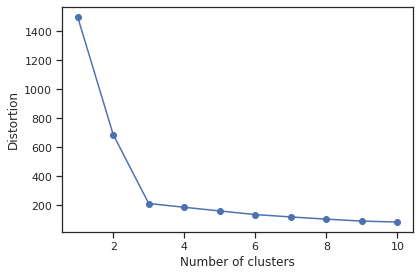

In [200]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(scaled_X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()


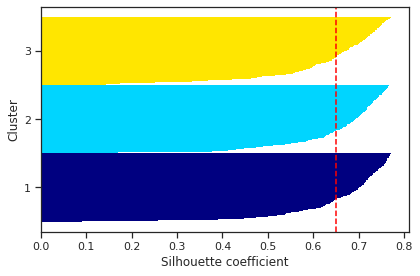

In [201]:
#**************Quantifying the quality of clustering via silhouette plots***********

from sklearn.metrics import silhouette_samples
from matplotlib import cm

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(scaled_X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()


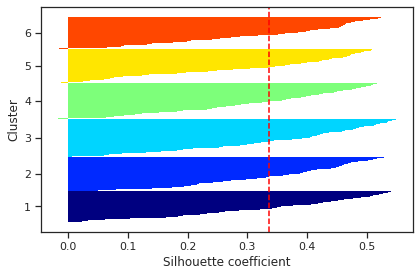

In [202]:
#**************Quantifying the quality of clustering via silhouette plots***********

from sklearn.metrics import silhouette_samples
from matplotlib import cm

km6 = KMeans(n_clusters=6, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km6 = km6.fit_predict(scaled_X)

cluster_labels = np.unique(y_km6)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km6, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km6 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()


From the above two silhoutte graphs it is clear that 3 cluster have a higher score 0.65 while 6 clusters have a lower score of 0.33. Hence, results of elbow method are confirmed.

** QUESTION: 2 **
## Find the rough feature ranges to classify these species correctly ##

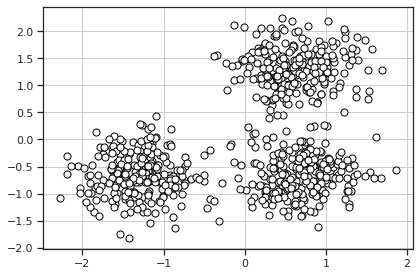

In [203]:
import matplotlib.pyplot as plt

plt.scatter(df1['f1'], df1['f2'], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

From the straight up plot of two features, one can see there are three clusters. The left-bottom cluster has x-axis range of -2 to -0.2 and y-axis range of -2 to 0.5. The bottom right cluster has x-axis range of 0-2 and y-axis range of -1.5-0.0. The top cluster has x-axis range of 0-2 and y-axis range of 0.5-2

** QUESTION: 3 **
## Finding anomalies by  K-means clustering

In [204]:
# setting up a new model with 3 clusters
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(scaled_X)


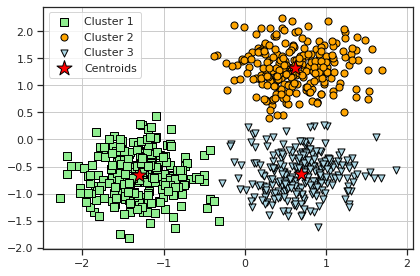

In [205]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()



In [206]:
# Steps to find points that are at farthest distance from each centroid

# finding distance of each point from the three centroids
# returns a 2D numpy array where each row represents distance of a point from 
# each centroid



In [207]:
# distance of each point from each of the three centroids
x_dist = km.transform(scaled_X)
print(x_dist)

[[2.77002819 0.18540951 2.10512711]
 [0.21940309 2.97429409 2.13225964]
 [2.35994651 0.39780045 1.72060428]
 ...
 [1.27080401 2.32797067 0.7978358 ]
 [0.70927162 2.20083736 1.98634327]
 [1.58890651 2.27235713 0.51612889]]


In [208]:
# fidning co-ordinates of the three centroid

center = km.cluster_centers_
print(center)

# labels
labels = km.labels_

[[-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]
 [ 0.6954587  -0.64442334]]


In [209]:
# filtering points by their labels to identify points in each cluster
# Then, calculating distance of each point from the centroid
# Then, discarding far away points

cluster_0 = X[km.labels_ == 0]
cluster_1 = X[km.labels_ == 1]
cluster_2 = X[km.labels_ == 2]
print(len(cluster_0), len(cluster_1), len(cluster_2))

clustdist_0 = x_dist[km.labels_ == 0]
clustdist_2 = x_dist[km.labels_ == 1]
clustdist_1 = x_dist[km.labels_ == 2]


print(len(clustdist_0), len(clustdist_1), len(clustdist_2))

252 248 250
252 250 248


In [210]:
from scipy.spatial.distance import euclidean
from numpy import sqrt, random, array, argsort

# finding distance of each point in cluster-0 from its centroid

d_centroid_0 = []
for i in range(len(cluster_0)):
  x_i = cluster_0[i][0] - center[0][0]
  y_i = cluster_0[i][1] - center[0][1]
  d_sq = (x_i * x_i) + (y_i * y_i)
  d = sqrt(d_sq)
  d_centroid_0.append(d)

d_centroid_1 = []
for i in range(len(cluster_1)):
  x_i = cluster_1[i][0] - center[1][0]
  y_i = cluster_1[i][1] - center[1][1]
  d_sq = (x_i * x_i) + (y_i * y_i)
  d = sqrt(d_sq)
  d_centroid_1.append(d)

d_centroid_2 = []
for i in range(len(cluster_2)):
  x_i = cluster_2[i][0] - center[2][0]
  y_i = cluster_2[i][1] - center[2][1]
  d_sq = (x_i * x_i) + (y_i * y_i)
  d = sqrt(d_sq)
  d_centroid_2.append(d)



In [211]:
# zipping the co-ordinates and thier distances from centroid
dist_0 = list(zip(cluster_0, d_centroid_0)) 
dist_1 = list(zip(cluster_1, d_centroid_1))
dist_2 = list(zip(cluster_2, d_centroid_2))

In [212]:
# sorting by distance

sorted_dist_0 = sorted(dist_0, key = lambda x: x[1], reverse = True)
sorted_dist_1 = sorted(dist_1, key = lambda x: x[1], reverse = True)
sorted_dist_2 = sorted(dist_2, key = lambda x: x[1], reverse = True)


# getting rid of points whose distance is more than 1 from respective centroid
removed_0 = []
for i in range(len(sorted_dist_0)):
  if sorted_dist_0[i][1] > 1:
    removed_0.append(sorted_dist_0[i])

removed_1 = []
for i in range(len(sorted_dist_1)):
  if sorted_dist_1[i][1] > 1:
    removed_1.append(sorted_dist_1[i])

removed_2 = []
for i in range(len(sorted_dist_2)):
  if sorted_dist_2[i][1] > 1:
    removed_2.append(sorted_dist_2[i])

removed = []

for i in range(len(removed_0)):
  removed.append(removed_0[i][0])

for i in range(len(removed_1)):
  removed.append(removed_1[i][0])

for i in range(len(removed_2)):
  removed.append(removed_2[i][0])
  


In [213]:
# selecting points whose distance is less than 1 from respective centroid

selected_0 = []
for i in range(len(sorted_dist_0)):
  if sorted_dist_0[i][1] < 1:
    selected_0.append(sorted_dist_0[i])

selected_1 = []
for i in range(len(sorted_dist_1)):
  if sorted_dist_1[i][1] < 1:
    selected_1.append(sorted_dist_1[i])

selected_2 = []
for i in range(len(sorted_dist_2)):
  if sorted_dist_2[i][1] < 1:
    selected_2.append(sorted_dist_2[i])

In [214]:
# adding all selected points in one list
selected = []

for i in range(len(selected_0)):
  selected.append(selected_0[i][0])

for i in range(len(selected_1)):
  selected.append(selected_1[i][0])

for i in range(len(selected_2)):
  selected.append(selected_2[i][0])



print(f'{len(selected)} points were selected and {len(removed)} using Kmeans clustering with 1 as threshold distance')

729 points were selected and 21 using Kmeans clustering with 1 as threshold distance


** Question: 3 **
## DBSCAN to find anomalies ##


In [215]:
#****** DBSCAN *********

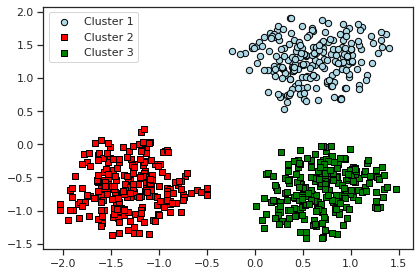

In [216]:
from sklearn.cluster import DBSCAN

# played with eps and min_samples values to obtain the best values for both
# but not showing the figures for each optimization

# set up model
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')

# predict on scaled_X values
y_db = db.fit_predict(scaled_X)

# for plotting
plt.scatter(scaled_X[y_db == 0, 0], scaled_X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(scaled_X[y_db == 1, 0], scaled_X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')

plt.scatter(scaled_X[y_db == 2, 0], scaled_X[y_db == 2, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 3')
plt.legend()
plt.tight_layout()

plt.show()

In [217]:
# separating outliers and inliers

outliers = []
for i in range(len(db.labels_)):
  if db.labels_[i] == -1:
    outliers.append(db.labels_[i])

inliers = []
for i in range(len(db.labels_)):
  if db.labels_[i] != -1:
    inliers.append(db.labels_[i])

print(f'the number of outliers are {len(outliers)} out of {len(db.labels_)}')
print(f'the number of inliers are {len(inliers)} out of {len(db.labels_)}')
    

the number of outliers are 91 out of 750
the number of inliers are 659 out of 750


In [218]:
# cleaned dataset

cluster_0 = list(zip(scaled_X[y_db == 0, 0], scaled_X[y_db == 0, 1]))
cluster_1 = list(zip(scaled_X[y_db == 1, 0], scaled_X[y_db == 1, 1]))
cluster_2 = list(zip(scaled_X[y_db == 2, 0], scaled_X[y_db == 2, 1]))

cleaned_dataset = []
for i in range(len(cluster_0)):
  cleaned_dataset.append(cluster_0[i])



for i in range(len(cluster_1)):
  cleaned_dataset.append(cluster_1[i])


for i in range(len(cluster_2)):
  cleaned_dataset.append(cluster_2[i])

print(f' The total number of points after removing anomalies by BDSCAN are {len(cleaned_dataset)}')

 The total number of points after removing anomalies by BDSCAN are 659


** Question: 5
## Developing a decision tree classifier using cleaned dataset obtained from DBSCAN ##

In [219]:
# Decision tree with cleaned dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = \
    train_test_split(cleaned_dataset, inliers, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe1_dt = make_pipeline(StandardScaler(),
                        
                        DecisionTreeClassifier())
pipe1_dt.fit(X_train, y_train)
y_pred1 = pipe1_dt.predict(X_test)
print('Test Accuracy: %.3f' % pipe1_dt.score(X_test, y_test))

Test Accuracy: 0.371


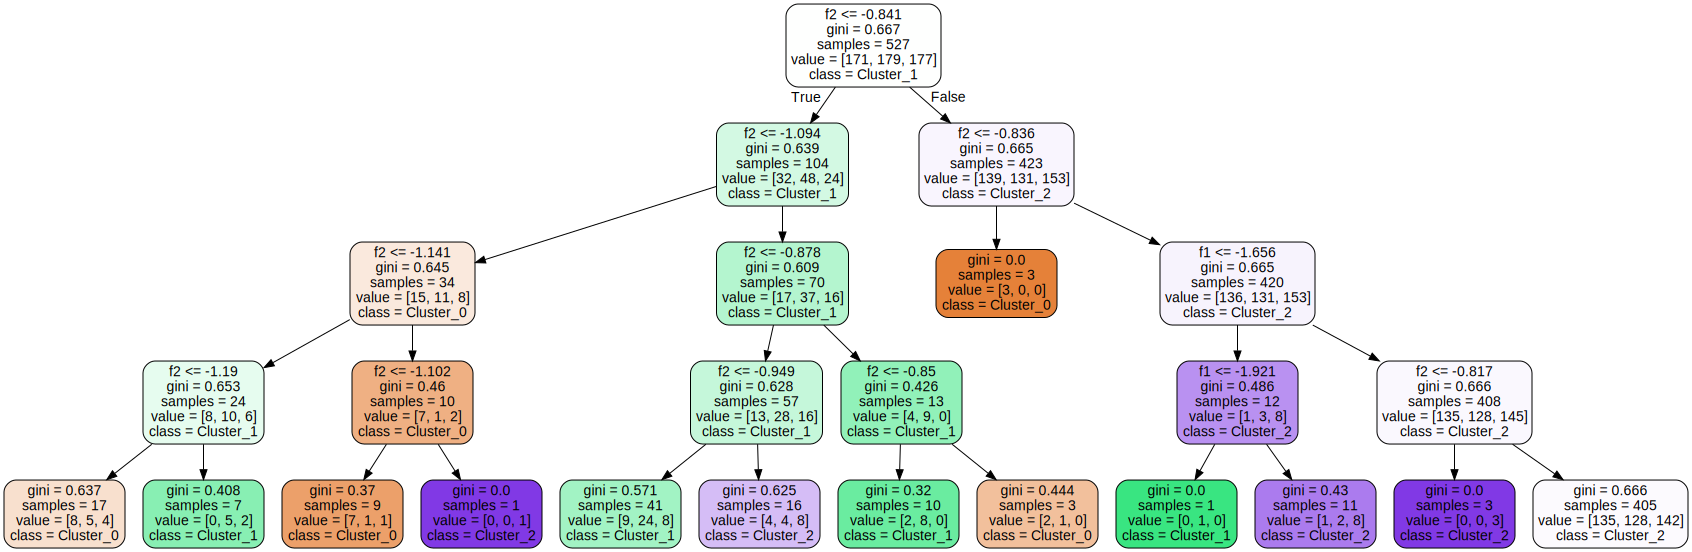

In [221]:
# visualizing tree
import graphviz
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn import tree
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Cluster_0', 
                                        'Cluster_1',
                                        'Cluster_2'],
                           feature_names=['f1', 
                                          'f2'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

graph = graphviz.Source(dot_data, format="png") 
graph

In [222]:
# decision tree with original(uncleaned data)
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = \
    train_test_split(scaled_X, y_km, 
                     test_size=0.20,
                     stratify=y_km,
                     random_state=1)

pipe2_dt = make_pipeline(StandardScaler(),
                        
                        DecisionTreeClassifier())


kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores2 = []
for k, (train, test) in enumerate(kfold):
    pipe2_dt.fit(X_train, y_train)
    score = pipe2_dt.score(X_train, y_train)
    scores2.append(score)
print('Test Accuracy: %.3f' % pipe2_dt.score(X_test, y_test))


Test Accuracy: 0.987


In [223]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator=pipe1_dt,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

scores2 = cross_val_score(estimator=pipe2_dt,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('Cross Validation accuracy for decistion tree on cleaned data: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))

print('Cross Validation accuracy for decistion tree on original data: %.3f +/- %.3f' % (np.mean(scores2), np.std(scores2)))

Cross Validation accuracy for decistion tree on cleaned data: 0.993 +/- 0.011
Cross Validation accuracy for decistion tree on original data: 0.993 +/- 0.011


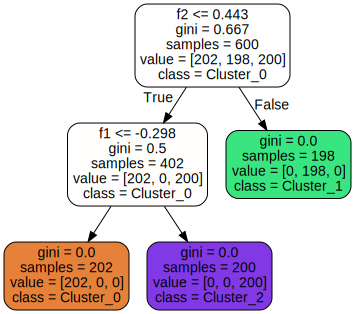

In [224]:
# visualizing the tree

import graphviz
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn import tree
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Cluster_0', 
                                        'Cluster_1',
                                        'Cluster_2'],
                           feature_names=['f1', 
                                          'f2'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

graph = graphviz.Source(dot_data, format="png") 
graph


In [225]:
# I think I made a mistake somewhere because my results for cleaned and uncleaned data are same